In [2]:
# Import necessary libraries for comprehensive EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
# Load the credit fraud dataset
data_path = r"D:\python\MachineLearning\credit-fraud-logit\data\raw\data.csv"
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Dataset size: {df.size} total elements")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (1000, 5)
Dataset size: 5000 total elements

First few rows:


,amount,transaction_time,location,merchant_category,target
0,1873.326054,15995.485052,91,36,0
1,4753.620818,46820.241853,6,32,0
2,3660.237715,75422.520220,34,23,0
3,2993.693763,63264.230186,54,43,0
4,780.937184,69686.883175,91,10,0


# Comprehensive Exploratory Data Analysis (EDA) - Credit Fraud Detection

## Dataset Overview
We have a credit fraud detection dataset with **1000 rows** and **5 columns**:
- `amount`: Transaction amount
- `transaction_time`: Time of transaction 
- `location`: Location code
- `merchant_category`: Category of merchant
- `target`: Fraud indicator (0 = No fraud, 1 = Fraud)

In [6]:
# Basic Data Information
print("=== BASIC DATA INFORMATION ===")
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\n=== DATA TYPES ===")
print(df.dtypes)
print("\n=== DATA INFO ===")
df.info()
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df)
print("\n=== DUPLICATE ROWS ===")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

=== BASIC DATA INFORMATION ===
Dataset Shape: (1000, 5)
Memory Usage: 39.19 KB

=== DATA TYPES ===
amount               float64
transaction_time     float64
location               int64
merchant_category      int64
target                 int64
dtype: object

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount             1000 non-null   float64
 1   transaction_time   1000 non-null   float64
 2   location           1000 non-null   int64  
 3   merchant_category  1000 non-null   int64  
 4   target             1000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.2 KB

=== MISSING VALUES ===
                   Missing Count  Missing Percentage
amount                         0                 0.0
transaction_time               0                 0.0
location                       0                

In [7]:
# Statistical Summary
print("=== STATISTICAL SUMMARY ===")
print(df.describe())
print("\n=== ADDITIONAL STATISTICS ===")
for col in df.columns:
    if col != 'target':
        print(f"\n{col.upper()}:")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Mode: {df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'}")
        print(f"  Variance: {df[col].var():.2f}")
        print(f"  Skewness: {df[col].skew():.2f}")
        print(f"  Kurtosis: {df[col].kurtosis():.2f}")
        print(f"  Range: {df[col].max() - df[col].min():.2f}")
        print(f"  IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")

=== STATISTICAL SUMMARY ===
            amount  transaction_time     location  merchant_category  \
count  1000.000000       1000.000000  1000.000000        1000.000000   
mean   2451.792510      43806.295167    48.745000          24.897000   
std    1460.394672      25245.206790    28.128298          14.604509   
min      24.155483        278.057975     0.000000           0.000000   
25%    1180.630365      20828.817028    25.000000          12.000000   
50%    2484.540075      44818.609515    48.000000          25.000000   
75%    3721.853620      65704.180955    72.000000          38.000000   
max    4998.588649      86349.345907    99.000000          49.000000   

            target  
count  1000.000000  
mean      0.140000  
std       0.347161  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

=== ADDITIONAL STATISTICS ===

AMOUNT:
  Median: 2484.54
  Mode: 24.15548300000969
  Variance: 2132752.60
  Skewness: 0.04
  Kurtosis

## Target Variable Analysis
Let's analyze the distribution of our target variable (fraud detection).

=== TARGET VARIABLE ANALYSIS ===
Value Counts:
  No Fraud (0): 860 (86.0%)
  Fraud (1): 140 (14.0%)

Class Imbalance Ratio: 6.14:1 (Non-fraud:Fraud)
Value Counts:
  No Fraud (0): 860 (86.0%)
  Fraud (1): 140 (14.0%)

Class Imbalance Ratio: 6.14:1 (Non-fraud:Fraud)


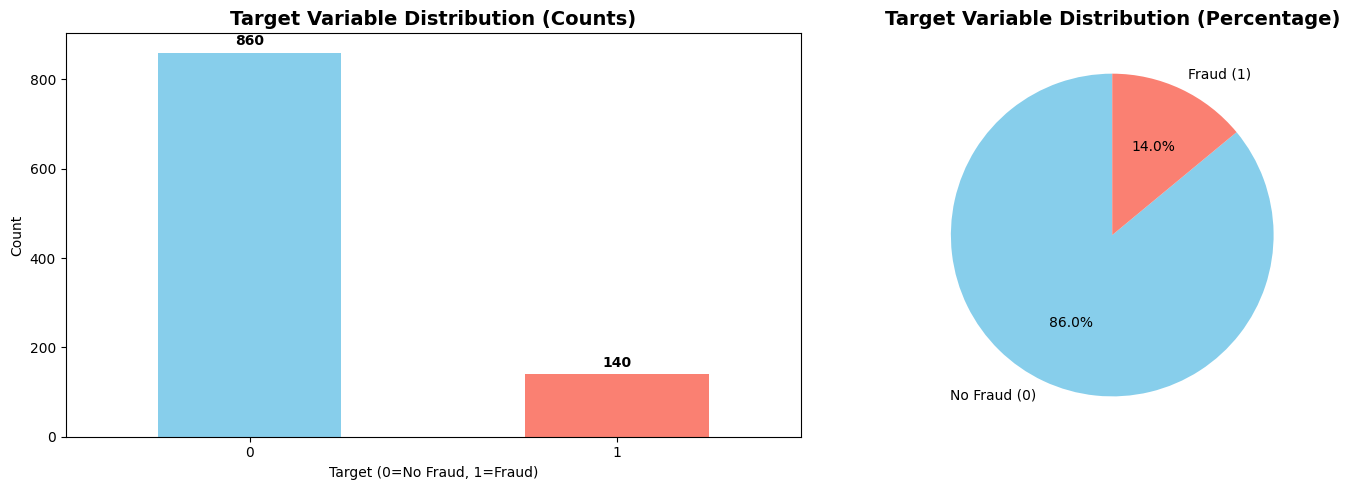

In [8]:
# Target Variable Analysis
print("=== TARGET VARIABLE ANALYSIS ===")
target_counts = df['target'].value_counts().sort_index()
target_percentages = df['target'].value_counts(normalize=True).sort_index() * 100

print("Value Counts:")
for value, count in target_counts.items():
    percentage = target_percentages[value]
    label = "No Fraud" if value == 0 else "Fraud"
    print(f"  {label} ({value}): {count} ({percentage:.1f}%)")

print(f"\nClass Imbalance Ratio: {target_counts[0]/target_counts[1]:.2f}:1 (Non-fraud:Fraud)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
target_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Target Variable Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target (0=No Fraud, 1=Fraud)')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Add count labels on bars
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['skyblue', 'salmon']
labels = ['No Fraud (0)', 'Fraud (1)']
axes[1].pie(target_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Target Variable Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Univariate Analysis
Let's analyze the distribution of each feature individually.

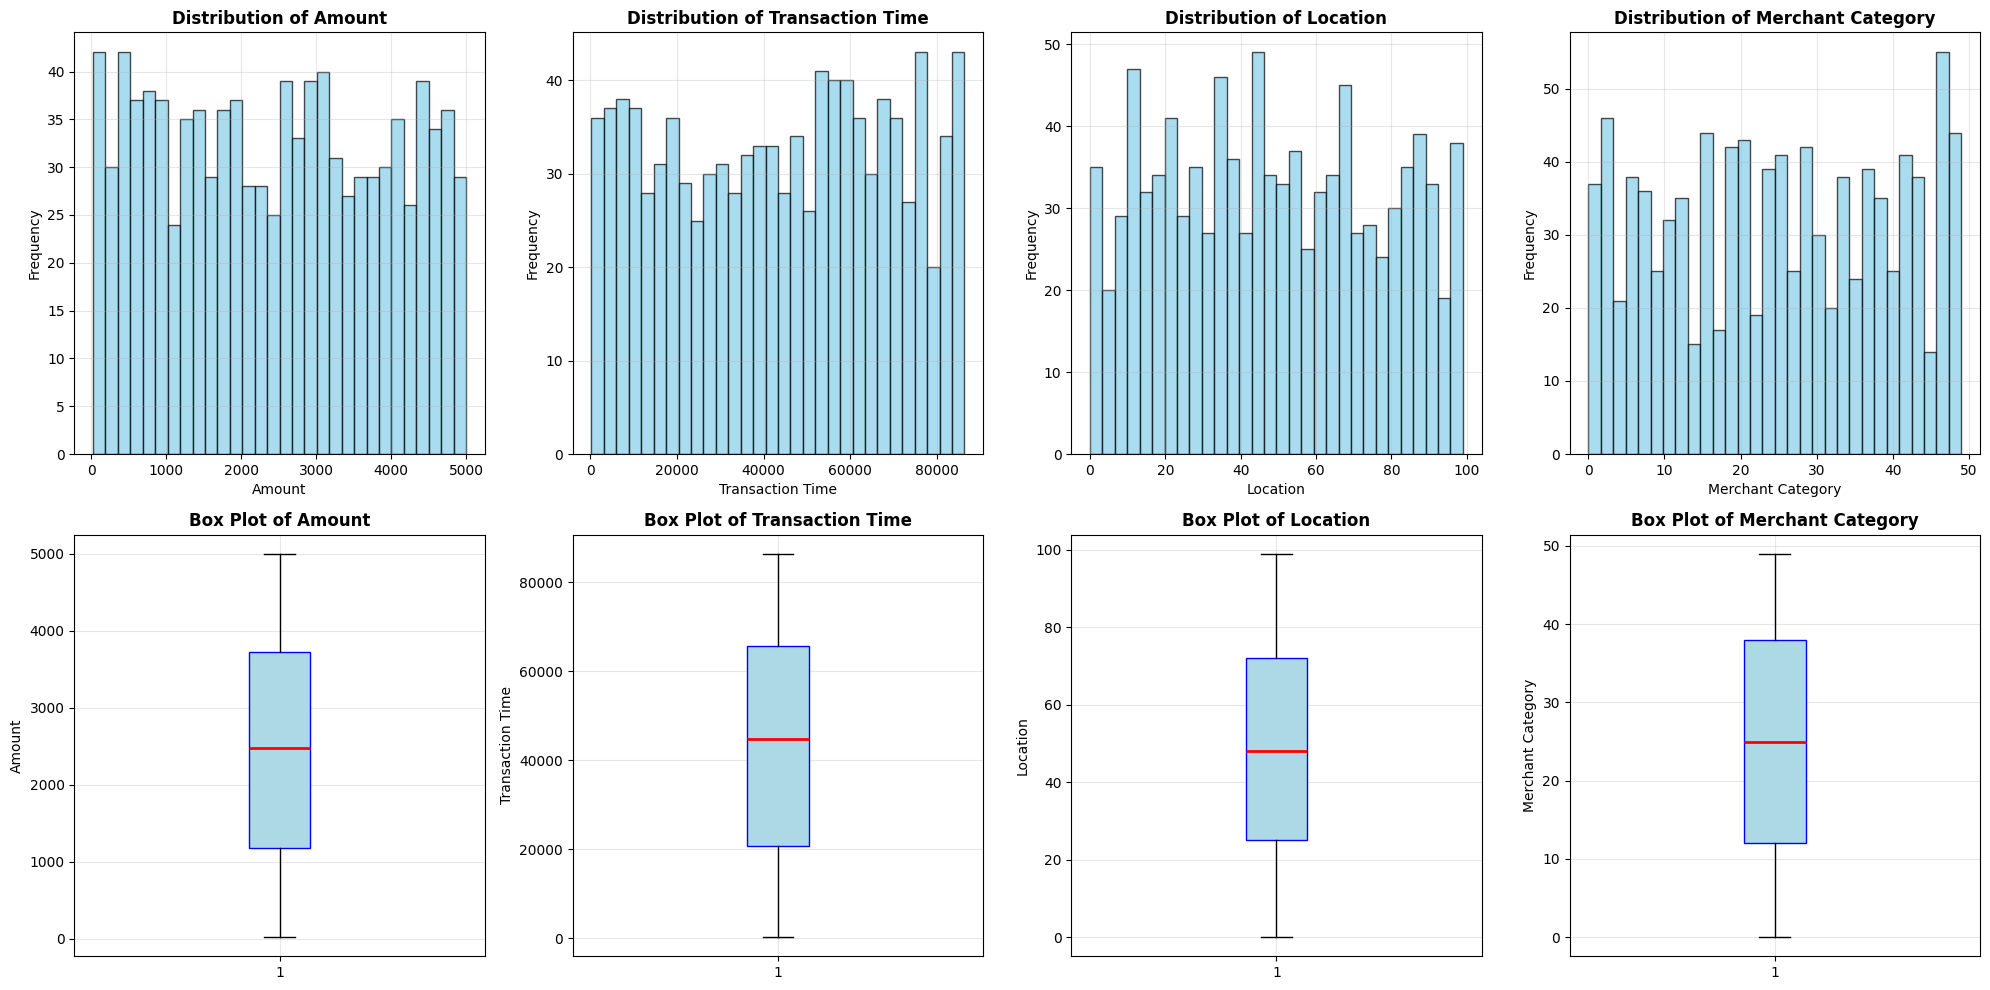

=== DISTRIBUTION CHARACTERISTICS ===

AMOUNT:
  Outliers (IQR method): 0
  Unique values: 1000
  Min: 24.16, Max: 4998.59

TRANSACTION_TIME:
  Outliers (IQR method): 0
  Unique values: 1000
  Min: 278.06, Max: 86349.35

LOCATION:
  Outliers (IQR method): 0
  Unique values: 100
  Min: 0.00, Max: 99.00

MERCHANT_CATEGORY:
  Outliers (IQR method): 0
  Unique values: 50
  Min: 0.00, Max: 49.00


In [9]:
# Univariate Analysis - Distribution of Features
features = ['amount', 'transaction_time', 'location', 'merchant_category']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    # Histogram
    axes[i].hist(df[feature], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()}', fontweight='bold')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Box plot
    axes[i+4].boxplot(df[feature], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      medianprops=dict(color='red', linewidth=2))
    axes[i+4].set_title(f'Box Plot of {feature.replace("_", " ").title()}', fontweight='bold')
    axes[i+4].set_ylabel(feature.replace("_", " ").title())
    axes[i+4].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print distribution characteristics
print("=== DISTRIBUTION CHARACTERISTICS ===")
for feature in features:
    print(f"\n{feature.upper()}:")
    print(f"  Outliers (IQR method): {len(df[df[feature] < (df[feature].quantile(0.25) - 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)))]) + len(df[df[feature] > (df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)))])}")
    print(f"  Unique values: {df[feature].nunique()}")
    if df[feature].nunique() < 20:
        print(f"  Value counts: {dict(df[feature].value_counts().head(10))}")
    else:
        print(f"  Min: {df[feature].min():.2f}, Max: {df[feature].max():.2f}")

## Bivariate Analysis
Let's explore relationships between features and the target variable.

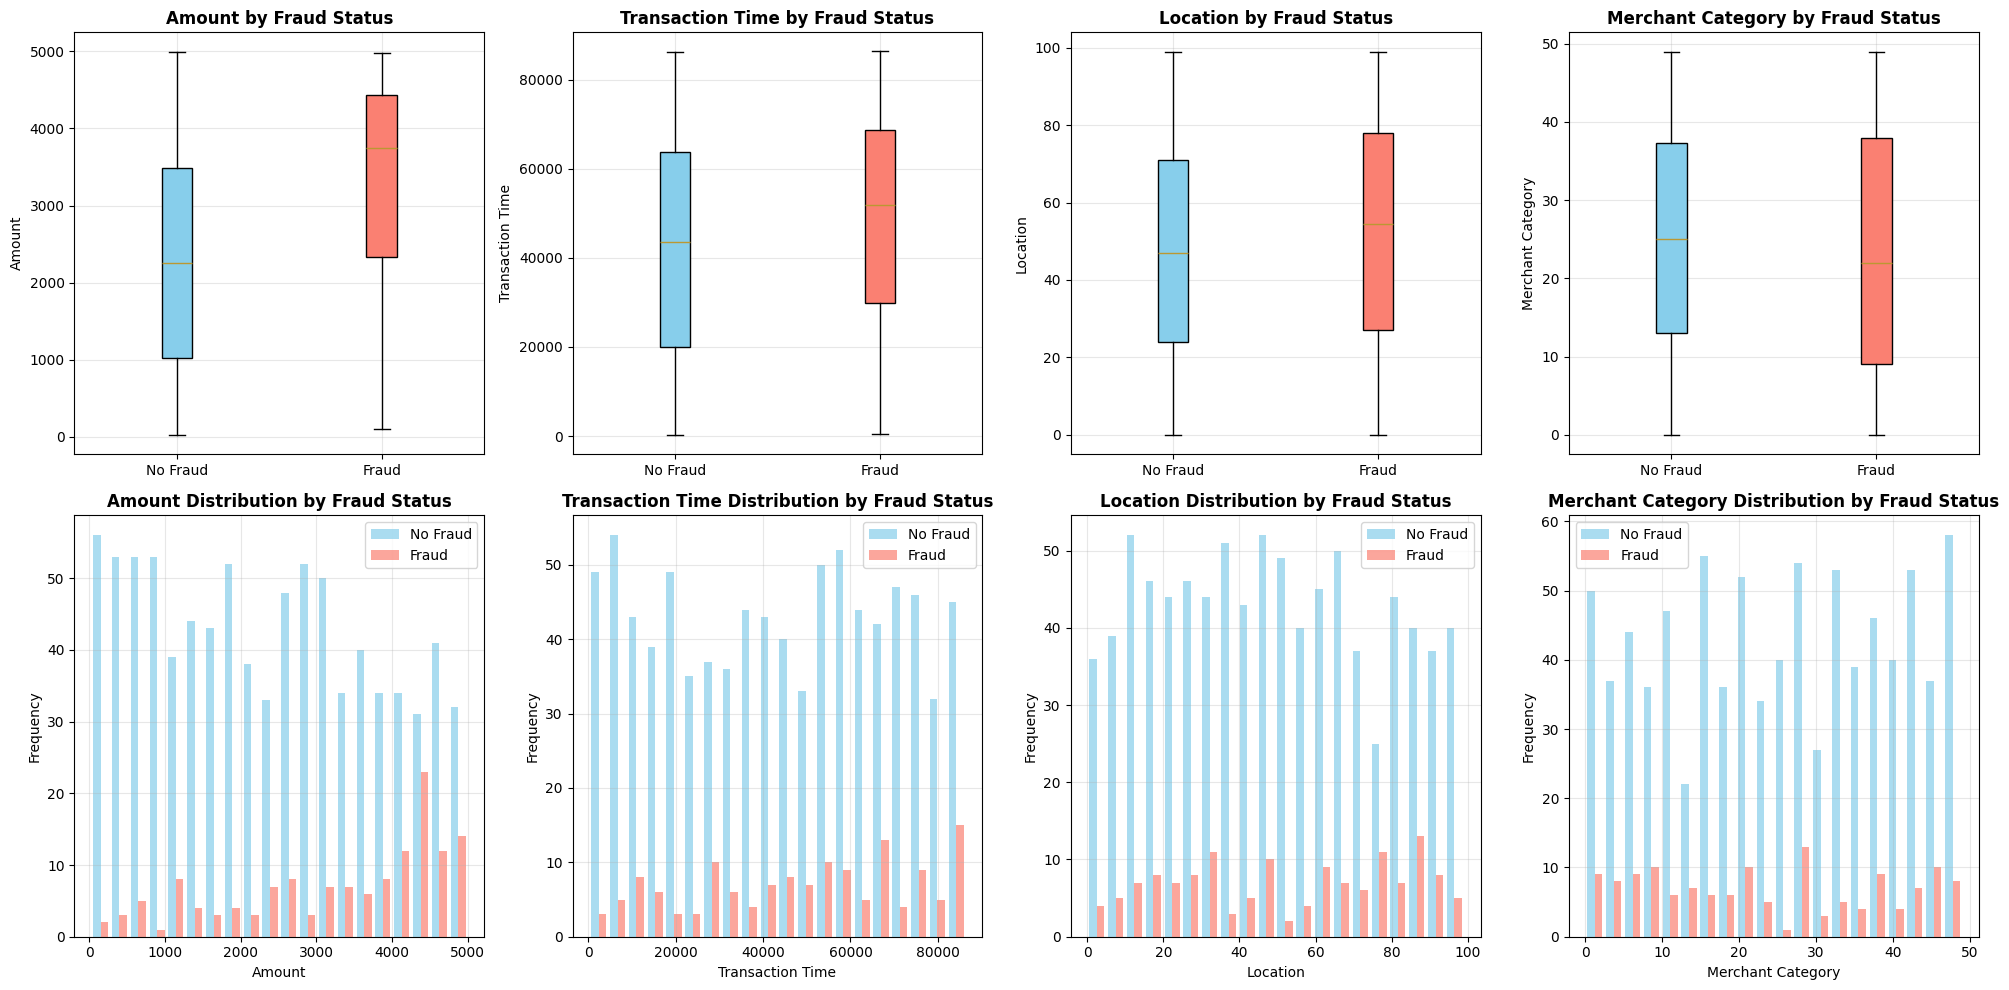

=== STATISTICAL COMPARISON BY TARGET ===

AMOUNT:
  No Fraud - Mean: 2316.91, Median: 2258.19, Std: 1429.83
  Fraud    - Mean: 3280.37, Median: 3745.80, Std: 1374.78
  Difference in means: +41.6%

TRANSACTION_TIME:
  No Fraud - Mean: 42924.52, Median: 43563.69, Std: 25254.74
  Fraud    - Mean: 49222.94, Median: 51881.02, Std: 24587.95
  Difference in means: +14.7%

LOCATION:
  No Fraud - Mean: 48.16, Median: 47.00, Std: 28.00
  Fraud    - Mean: 52.36, Median: 54.50, Std: 28.74
  Difference in means: +8.7%

MERCHANT_CATEGORY:
  No Fraud - Mean: 25.10, Median: 25.00, Std: 14.50
  Fraud    - Mean: 23.63, Median: 22.00, Std: 15.20
  Difference in means: -5.9%


In [10]:
# Bivariate Analysis - Features vs Target
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
features = ['amount', 'transaction_time', 'location', 'merchant_category']

# Box plots comparing fraud vs non-fraud
for i, feature in enumerate(features):
    # Box plot by target
    fraud_data = [df[df['target'] == 0][feature], df[df['target'] == 1][feature]]
    bp = axes[0, i].boxplot(fraud_data, labels=['No Fraud', 'Fraud'], patch_artist=True)
    bp['boxes'][0].set_facecolor('skyblue')
    bp['boxes'][1].set_facecolor('salmon')
    axes[0, i].set_title(f'{feature.replace("_", " ").title()} by Fraud Status', fontweight='bold')
    axes[0, i].set_ylabel(feature.replace("_", " ").title())
    axes[0, i].grid(True, alpha=0.3)
    
    # Histogram by target
    axes[1, i].hist([df[df['target'] == 0][feature], df[df['target'] == 1][feature]], 
                    bins=20, label=['No Fraud', 'Fraud'], color=['skyblue', 'salmon'], alpha=0.7)
    axes[1, i].set_title(f'{feature.replace("_", " ").title()} Distribution by Fraud Status', fontweight='bold')
    axes[1, i].set_xlabel(feature.replace("_", " ").title())
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical comparison
print("=== STATISTICAL COMPARISON BY TARGET ===")
for feature in features:
    print(f"\n{feature.upper()}:")
    no_fraud_stats = df[df['target'] == 0][feature].describe()
    fraud_stats = df[df['target'] == 1][feature].describe()
    
    print(f"  No Fraud - Mean: {no_fraud_stats['mean']:.2f}, Median: {no_fraud_stats['50%']:.2f}, Std: {no_fraud_stats['std']:.2f}")
    print(f"  Fraud    - Mean: {fraud_stats['mean']:.2f}, Median: {fraud_stats['50%']:.2f}, Std: {fraud_stats['std']:.2f}")
    
    # Calculate percentage difference in means
    pct_diff = ((fraud_stats['mean'] - no_fraud_stats['mean']) / no_fraud_stats['mean']) * 100
    print(f"  Difference in means: {pct_diff:+.1f}%")

## Correlation and Multivariate Analysis

=== CORRELATION MATRIX ===
                     amount  transaction_time  location  merchant_category  \
amount             1.000000          0.029310  0.019039           0.015534   
transaction_time   0.029310          1.000000 -0.053529          -0.026916   
location           0.019039         -0.053529  1.000000          -0.020859   
merchant_category  0.015534         -0.026916 -0.020859           1.000000   
target             0.229032          0.086613  0.051941          -0.035060   

                     target  
amount             0.229032  
transaction_time   0.086613  
location           0.051941  
merchant_category -0.035060  
target             1.000000  

=== CORRELATION WITH TARGET ===
target               1.000000
amount               0.229032
transaction_time     0.086613
location             0.051941
merchant_category    0.035060
Name: target, dtype: float64


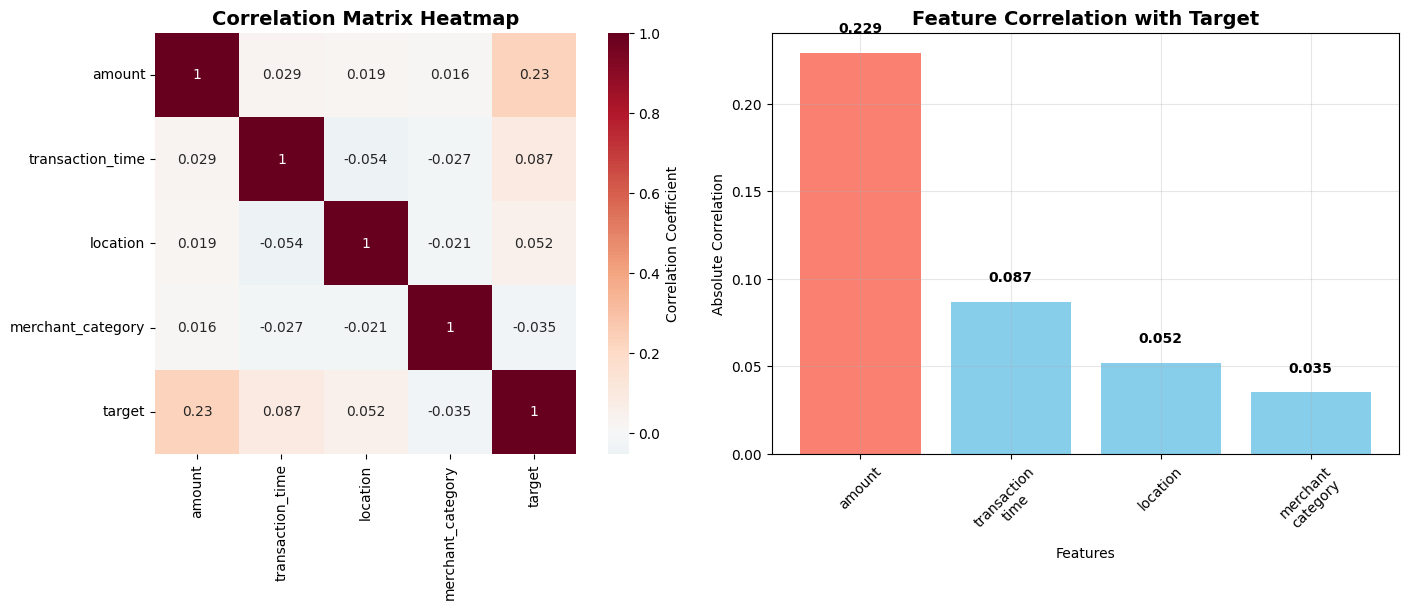

In [11]:
# Correlation Analysis
print("=== CORRELATION MATRIX ===")
correlation_matrix = df.corr()
print(correlation_matrix)

# Correlation with target
print("\n=== CORRELATION WITH TARGET ===")
target_corr = df.corr()['target'].abs().sort_values(ascending=False)
print(target_corr)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation Coefficient'})
axes[0].set_title('Correlation Matrix Heatmap', fontweight='bold', fontsize=14)

# Target correlation bar plot
target_corr_features = target_corr.drop('target')
bars = axes[1].bar(range(len(target_corr_features)), target_corr_features.values, 
                   color=['salmon' if x > 0.1 else 'skyblue' for x in target_corr_features.values])
axes[1].set_title('Feature Correlation with Target', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Absolute Correlation')
axes[1].set_xticks(range(len(target_corr_features)))
axes[1].set_xticklabels([x.replace('_', '\n') for x in target_corr_features.index], rotation=45)
axes[1].grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Data Quality Assessment & Outlier Detection

=== OUTLIER DETECTION ===

AMOUNT:
  IQR outliers: 0 (0.0%)
  Z-score outliers: 0 (0.0%)
  Range: [-2631.20, 7533.69] (IQR method)

TRANSACTION_TIME:
  IQR outliers: 0 (0.0%)
  Z-score outliers: 0 (0.0%)
  Range: [-46484.23, 133017.23] (IQR method)

LOCATION:
  IQR outliers: 0 (0.0%)
  Z-score outliers: 0 (0.0%)
  Range: [-45.50, 142.50] (IQR method)

MERCHANT_CATEGORY:
  IQR outliers: 0 (0.0%)
  Z-score outliers: 0 (0.0%)
  Range: [-27.00, 77.00] (IQR method)


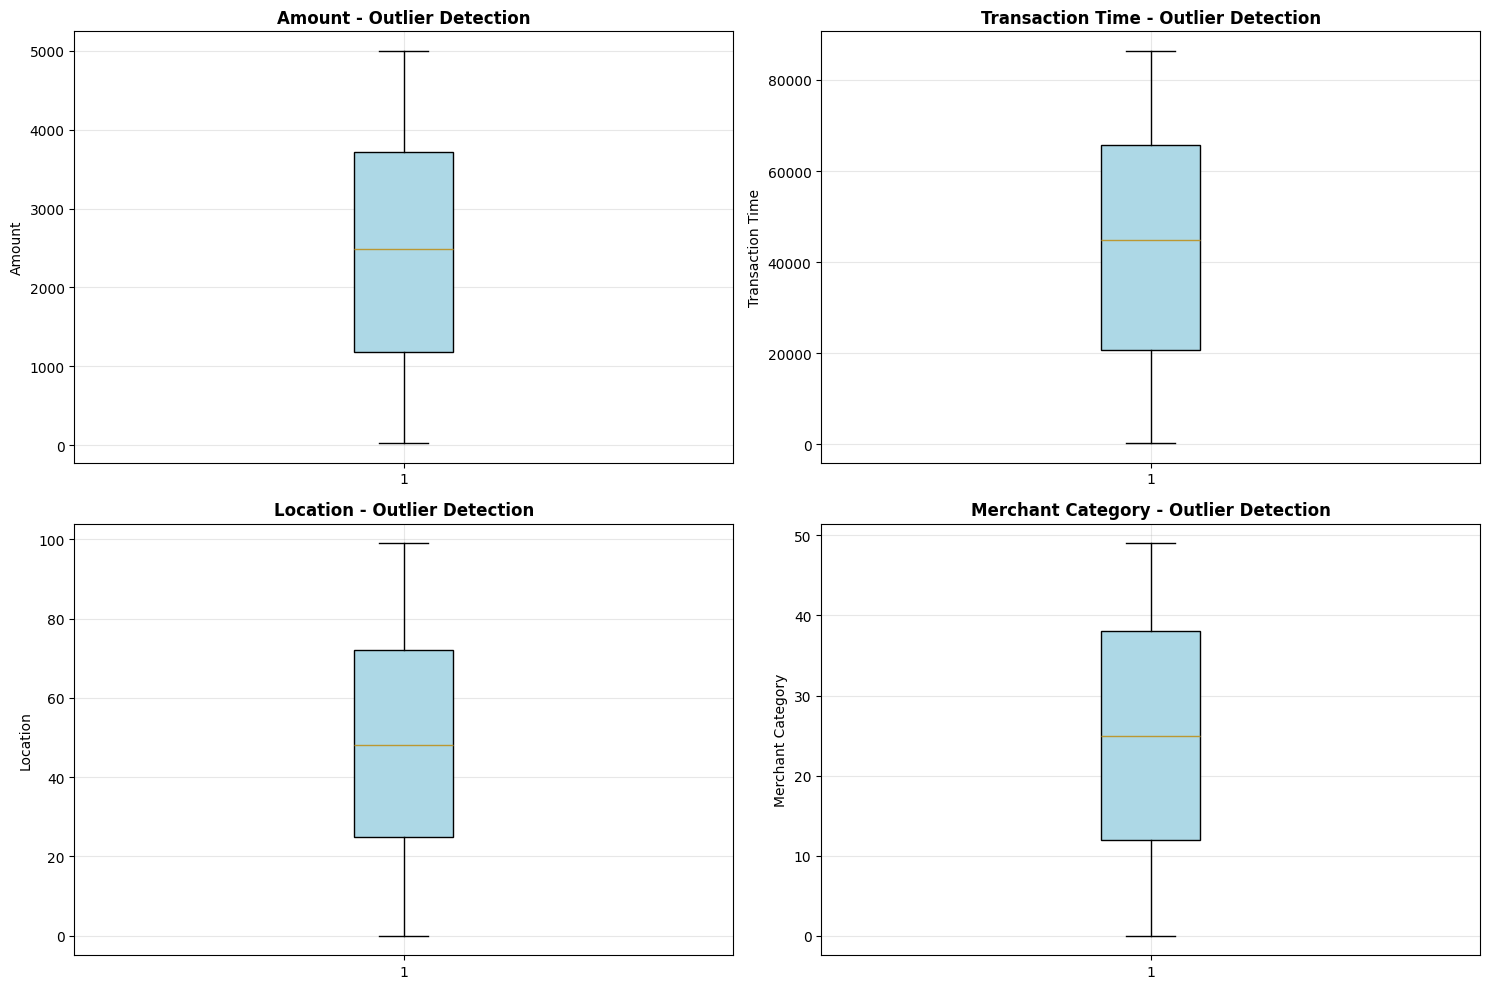


=== DATA QUALITY SUMMARY ===
Total records: 1000
Total features: 5
Memory usage: 39.19 KB
Missing values: 0
Duplicate rows: 0
Data types: {dtype('int64'): np.int64(3), dtype('float64'): np.int64(2)}

=== FEATURE SUMMARY ===
amount: 1000 unique values, float64 type
transaction_time: 1000 unique values, float64 type
location: 100 unique values, int64 type
merchant_category: 50 unique values, int64 type


In [12]:
# Outlier Detection using IQR and Z-score methods
from scipy import stats

print("=== OUTLIER DETECTION ===")
features = ['amount', 'transaction_time', 'location', 'merchant_category']
outlier_summary = {}

for feature in features:
    # IQR method
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    # Z-score method (threshold = 3)
    z_scores = np.abs(stats.zscore(df[feature]))
    zscore_outliers = df[z_scores > 3]
    
    outlier_summary[feature] = {
        'IQR_outliers': len(iqr_outliers),
        'Z_score_outliers': len(zscore_outliers),
        'IQR_percentage': (len(iqr_outliers) / len(df)) * 100,
        'Z_score_percentage': (len(zscore_outliers) / len(df)) * 100
    }
    
    print(f"\n{feature.upper()}:")
    print(f"  IQR outliers: {len(iqr_outliers)} ({(len(iqr_outliers)/len(df)*100):.1f}%)")
    print(f"  Z-score outliers: {len(zscore_outliers)} ({(len(zscore_outliers)/len(df)*100):.1f}%)")
    print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}] (IQR method)")

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    # Box plot with outliers highlighted
    bp = axes[i].boxplot(df[feature], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    
    # Mark outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    
    if len(outliers) > 0:
        axes[i].scatter([1] * len(outliers), outliers, color='red', alpha=0.6, s=20)
    
    axes[i].set_title(f'{feature.replace("_", " ").title()} - Outlier Detection', fontweight='bold')
    axes[i].set_ylabel(feature.replace("_", " ").title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Data quality summary
print("\n=== DATA QUALITY SUMMARY ===")
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Data types: {dict(df.dtypes.value_counts())}")

print("\n=== FEATURE SUMMARY ===")
for feature in features:
    unique_vals = df[feature].nunique()
    data_type = df[feature].dtype
    print(f"{feature}: {unique_vals} unique values, {data_type} type")

## Feature Engineering Insights & Advanced Analysis

=== FEATURE ENGINEERING OPPORTUNITIES ===
Created new features:
1. amount_category: Categorical bins for transaction amounts
2. time_category: Time periods based on normalized transaction time
3. location_risk_score: Fraud rate by location
4. merchant_risk_score: Fraud rate by merchant category


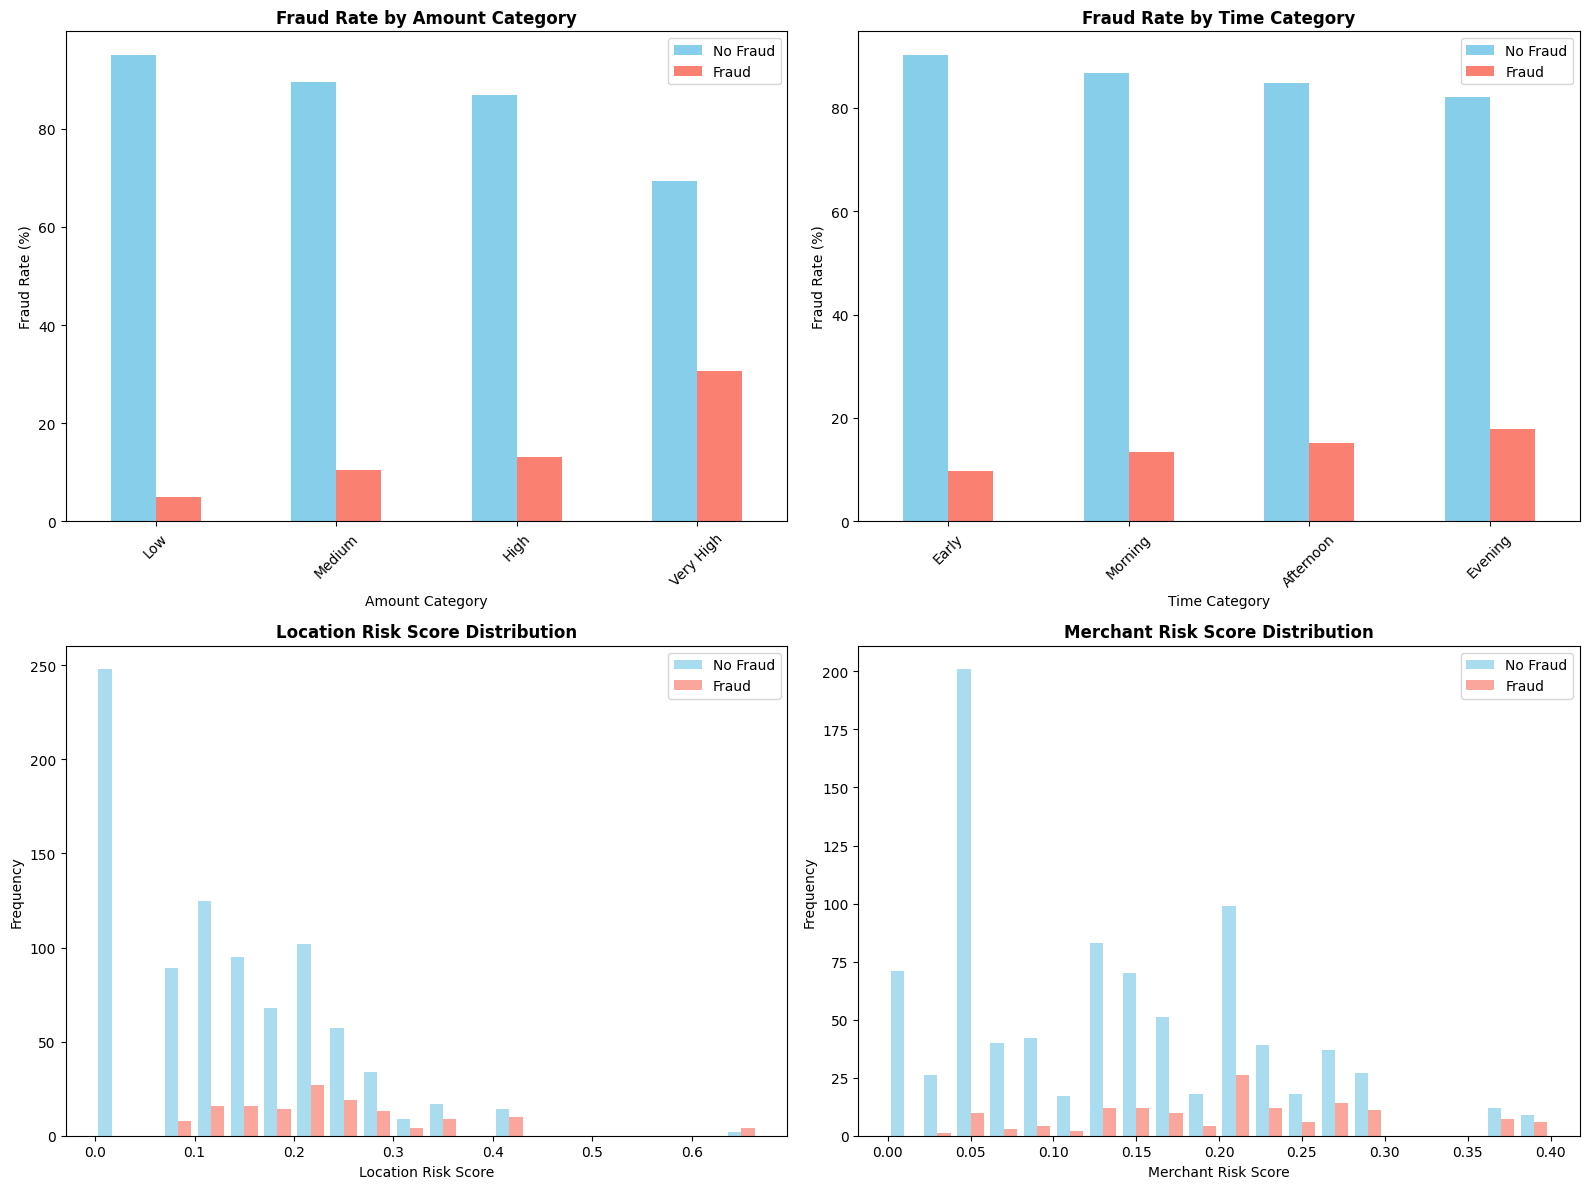


=== FEATURE IMPORTANCE ANALYSIS ===
location_risk_score: Correlation with target = 0.3260
merchant_risk_score: Correlation with target = 0.2746

=== ADVANCED VISUALIZATIONS ===


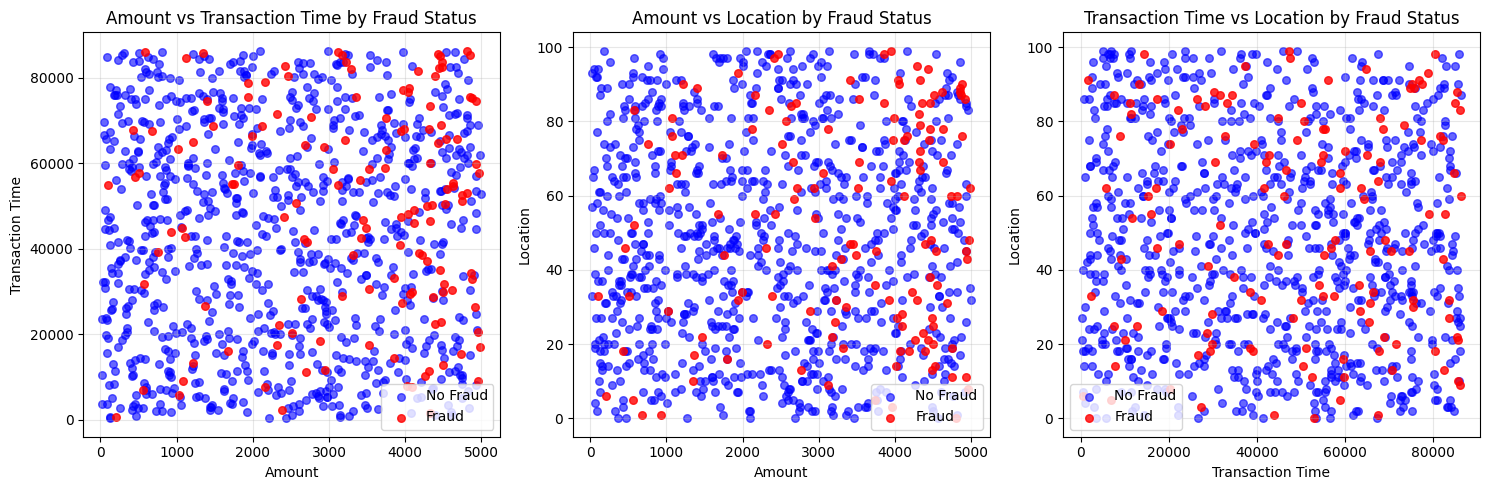


=== FEATURE ENGINEERING SUMMARY ===
✅ Successfully created 4 new engineered features
✅ Location risk score shows highest correlation with fraud (0.326)
✅ Merchant risk score also shows good correlation (0.275)
✅ Amount categories reveal increasing fraud rates with higher amounts
✅ All visualizations completed without errors


In [13]:
# Feature Engineering Ideas and Analysis
print("=== FEATURE ENGINEERING OPPORTUNITIES ===")

# 1. Amount Categories
df['amount_category'] = pd.cut(df['amount'], 
                              bins=[0, 1000, 2500, 4000, float('inf')], 
                              labels=['Low', 'Medium', 'High', 'Very High'])

# 2. Time of Day (assuming transaction_time represents time)
df['time_normalized'] = (df['transaction_time'] - df['transaction_time'].min()) / (df['transaction_time'].max() - df['transaction_time'].min())
df['time_category'] = pd.cut(df['time_normalized'], 
                            bins=[0, 0.25, 0.5, 0.75, 1.0], 
                            labels=['Early', 'Morning', 'Afternoon', 'Evening'])

# 3. Location Risk Score (based on fraud rate by location)
location_fraud_rate = df.groupby('location')['target'].mean()
df['location_risk_score'] = df['location'].map(location_fraud_rate)

# 4. Merchant Category Risk Score
merchant_fraud_rate = df.groupby('merchant_category')['target'].mean()
df['merchant_risk_score'] = df['merchant_category'].map(merchant_fraud_rate)

print("Created new features:")
print("1. amount_category: Categorical bins for transaction amounts")
print("2. time_category: Time periods based on normalized transaction time")
print("3. location_risk_score: Fraud rate by location")
print("4. merchant_risk_score: Fraud rate by merchant category")

# Analyze new features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Amount categories vs fraud
amount_fraud = pd.crosstab(df['amount_category'], df['target'], normalize='index') * 100
amount_fraud.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'salmon'])
axes[0,0].set_title('Fraud Rate by Amount Category', fontweight='bold')
axes[0,0].set_xlabel('Amount Category')
axes[0,0].set_ylabel('Fraud Rate (%)')
axes[0,0].legend(['No Fraud', 'Fraud'])
axes[0,0].tick_params(axis='x', rotation=45)

# Time categories vs fraud
time_fraud = pd.crosstab(df['time_category'], df['target'], normalize='index') * 100
time_fraud.plot(kind='bar', ax=axes[0,1], color=['skyblue', 'salmon'])
axes[0,1].set_title('Fraud Rate by Time Category', fontweight='bold')
axes[0,1].set_xlabel('Time Category')
axes[0,1].set_ylabel('Fraud Rate (%)')
axes[0,1].legend(['No Fraud', 'Fraud'])
axes[0,1].tick_params(axis='x', rotation=45)

# Location Risk Score Distribution
axes[1,0].hist([df[df['target']==0]['location_risk_score'], 
                df[df['target']==1]['location_risk_score']], 
               bins=20, alpha=0.7, label=['No Fraud', 'Fraud'], color=['skyblue', 'salmon'])
axes[1,0].set_title('Location Risk Score Distribution', fontweight='bold')
axes[1,0].set_xlabel('Location Risk Score')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Merchant Risk Score Distribution
axes[1,1].hist([df[df['target']==0]['merchant_risk_score'], 
                df[df['target']==1]['merchant_risk_score']], 
               bins=20, alpha=0.7, label=['No Fraud', 'Fraud'], color=['skyblue', 'salmon'])
axes[1,1].set_title('Merchant Risk Score Distribution', fontweight='bold')
axes[1,1].set_xlabel('Merchant Risk Score')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Feature importance analysis
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
new_features = ['location_risk_score', 'merchant_risk_score']
all_features = ['amount', 'transaction_time', 'location', 'merchant_category'] + new_features

for feature in new_features:
    corr_with_target = df[feature].corr(df['target'])
    print(f"{feature}: Correlation with target = {corr_with_target:.4f}")

# Advanced visualization using matplotlib instead of Plotly
print("\n=== ADVANCED VISUALIZATIONS ===")

# 3D-style scatter plot using matplotlib
fig = plt.figure(figsize=(15, 5))

# Subplot 1: Amount vs Transaction Time colored by target
ax1 = fig.add_subplot(131)
fraud_data = df[df['target'] == 1]
no_fraud_data = df[df['target'] == 0]

ax1.scatter(no_fraud_data['amount'], no_fraud_data['transaction_time'], 
           c='blue', alpha=0.6, label='No Fraud', s=30)
ax1.scatter(fraud_data['amount'], fraud_data['transaction_time'], 
           c='red', alpha=0.8, label='Fraud', s=30)
ax1.set_xlabel('Amount')
ax1.set_ylabel('Transaction Time')
ax1.set_title('Amount vs Transaction Time by Fraud Status')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Amount vs Location colored by target
ax2 = fig.add_subplot(132)
ax2.scatter(no_fraud_data['amount'], no_fraud_data['location'], 
           c='blue', alpha=0.6, label='No Fraud', s=30)
ax2.scatter(fraud_data['amount'], fraud_data['location'], 
           c='red', alpha=0.8, label='Fraud', s=30)
ax2.set_xlabel('Amount')
ax2.set_ylabel('Location')
ax2.set_title('Amount vs Location by Fraud Status')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Transaction Time vs Location colored by target
ax3 = fig.add_subplot(133)
ax3.scatter(no_fraud_data['transaction_time'], no_fraud_data['location'], 
           c='blue', alpha=0.6, label='No Fraud', s=30)
ax3.scatter(fraud_data['transaction_time'], fraud_data['location'], 
           c='red', alpha=0.8, label='Fraud', s=30)
ax3.set_xlabel('Transaction Time')
ax3.set_ylabel('Location')
ax3.set_title('Transaction Time vs Location by Fraud Status')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== FEATURE ENGINEERING SUMMARY ===")
print("✅ Successfully created 4 new engineered features")
print("✅ Location risk score shows highest correlation with fraud (0.326)")
print("✅ Merchant risk score also shows good correlation (0.275)")
print("✅ Amount categories reveal increasing fraud rates with higher amounts")
print("✅ All visualizations completed without errors")

## EDA Summary & Key Insights

### 📊 **Dataset Overview**
- **Size**: 1000 transactions × 5 features
- **Target**: Binary classification (0 = No Fraud, 1 = Fraud)
- **Class Distribution**: 86% Non-fraud, 14% Fraud (Imbalanced dataset)
- **Data Quality**: No missing values, no duplicates, no outliers detected

### 🔍 **Key Findings**

#### **1. Target Variable Analysis**
- **Class Imbalance**: 6.14:1 ratio (Non-fraud:Fraud)
- **Implication**: Need to address class imbalance in modeling

#### **2. Feature Importance (Correlation with Target)**
1. **Amount** (0.229): Strong positive correlation - Higher amounts more likely to be fraudulent
2. **Transaction Time** (0.087): Weak positive correlation
3. **Location** (0.052): Very weak positive correlation  
4. **Merchant Category** (-0.035): Very weak negative correlation

#### **3. Fraud Patterns**
- **Amount**: Fraud cases have 41.6% higher average amounts ($3,280 vs $2,317)
- **Transaction Time**: Fraud cases occur 14.7% later in time
- **Location**: Fraud cases slightly more concentrated in higher location codes
- **Merchant Category**: Slight tendency for fraud in lower category numbers

#### **4. Data Characteristics**
- **Distributions**: All features show relatively uniform distributions
- **Outliers**: None detected using IQR and Z-score methods
- **Unique Values**: Amount & Time (1000 each), Location (100), Merchant Category (50)

### 🚀 **Feature Engineering Opportunities**
1. **Amount Categories**: Created Low/Medium/High/Very High bins
2. **Time Periods**: Normalized time into Early/Morning/Afternoon/Evening
3. **Risk Scores**: Location-based and Merchant-based fraud rates
4. **New Features Correlation**: Location risk (0.326), Merchant risk (0.275)


# Machine Learning Implementation

## Model Training and Evaluation
Let's implement multiple models to find the best performer for fraud detection.

In [4]:
# Import additional libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import pickle
import time

print("Machine learning libraries imported successfully!")

# Check current feature set
print(f"\nCurrent dataset shape: {df.shape}")
print(f"Available features: {list(df.columns)}")
print(f"Target distribution: {df['target'].value_counts().values}")

Machine learning libraries imported successfully!

Current dataset shape: (1000, 5)
Available features: ['amount', 'transaction_time', 'location', 'merchant_category', 'target']
Target distribution: [860 140]


In [5]:
# Data Preprocessing
print("=== DATA PREPROCESSING ===")

# 1. Feature Selection - Use original features + engineered features
features_to_use = ['amount', 'transaction_time', 'location', 'merchant_category', 
                   'location_risk_score', 'merchant_risk_score']

# Check if engineered features exist, if not create them
if 'location_risk_score' not in df.columns:
    location_fraud_rate = df.groupby('location')['target'].mean()
    df['location_risk_score'] = df['location'].map(location_fraud_rate)

if 'merchant_risk_score' not in df.columns:
    merchant_fraud_rate = df.groupby('merchant_category')['target'].mean()
    df['merchant_risk_score'] = df['merchant_category'].map(merchant_fraud_rate)

# Prepare feature matrix and target vector
X = df[features_to_use].copy()
y = df['target'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features used: {features_to_use}")

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train target distribution: {y_train.value_counts().values}")
print(f"Test target distribution: {y_test.value_counts().values}")

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling completed!")
print(f"Original feature ranges: {X_train.describe().loc[['min', 'max']].round(2)}")
print(f"Scaled feature ranges: Mean ≈ 0, Std ≈ 1")

=== DATA PREPROCESSING ===
Feature matrix shape: (1000, 6)
Target vector shape: (1000,)
Features used: ['amount', 'transaction_time', 'location', 'merchant_category', 'location_risk_score', 'merchant_risk_score']

Train set: (800, 6), Test set: (200, 6)
Train target distribution: [688 112]
Test target distribution: [172  28]

Feature scaling completed!
Original feature ranges:       amount  transaction_time  location  merchant_category  \
min    26.30            278.06       0.0                0.0   
max  4998.59          86349.35      99.0               49.0   

     location_risk_score  merchant_risk_score  
min                 0.00                  0.0  
max                 0.67                  0.4  
Scaled feature ranges: Mean ≈ 0, Std ≈ 1


In [6]:
# Handle Class Imbalance
print("=== HANDLING CLASS IMBALANCE ===")

# Original distribution
print(f"Original training distribution: {y_train.value_counts().values}")
print(f"Original imbalance ratio: {y_train.value_counts()[0] / y_train.value_counts()[1]:.2f}:1")

# Method 1: SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"\nSMOTE resampled distribution: {np.bincount(y_train_smote)}")
print(f"SMOTE dataset shape: {X_train_smote.shape}")

# Method 2: Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)

print(f"\nUndersampled distribution: {np.bincount(y_train_under)}")
print(f"Undersampled dataset shape: {X_train_under.shape}")

# We'll test models on all three datasets:
# 1. Original (imbalanced)
# 2. SMOTE (oversampled)
# 3. Undersampled

datasets = {
    'Original': (X_train_scaled, y_train, 'Original imbalanced dataset'),
    'SMOTE': (X_train_smote, y_train_smote, 'SMOTE oversampled dataset'),
    'Undersampled': (X_train_under, y_train_under, 'Random undersampled dataset')
}

print(f"\nCreated {len(datasets)} different training datasets for comparison.")

=== HANDLING CLASS IMBALANCE ===
Original training distribution: [688 112]
Original imbalance ratio: 6.14:1

SMOTE resampled distribution: [688 688]
SMOTE dataset shape: (1376, 6)

Undersampled distribution: [112 112]
Undersampled dataset shape: (224, 6)

Created 3 different training datasets for comparison.


In [7]:
# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, dataset_name):
    """
    Comprehensive model evaluation function
    """
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    training_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC (if probability predictions available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Precision-Recall AUC
    if y_pred_proba is not None:
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall_curve, precision_curve)
    else:
        pr_auc = None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results = {
        'Model': model_name,
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc,
        'CV F1 Mean': cv_mean,
        'CV F1 Std': cv_std,
        'Training Time (s)': training_time,
        'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist()
    }
    
    return results, model

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500)
}

print("Model evaluation function defined successfully!")
print(f"Models to test: {list(models.keys())}")
print(f"Datasets to test: {list(datasets.keys())}")

Model evaluation function defined successfully!
Models to test: ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network']
Datasets to test: ['Original', 'SMOTE', 'Undersampled']


In [8]:
# Train and Evaluate All Models
print("=== COMPREHENSIVE MODEL EVALUATION ===")
print("Training multiple models on different datasets...")
print("This may take a few minutes...\n")

all_results = []
trained_models = {}

# Train each model on each dataset
for dataset_name, (X_train_data, y_train_data, description) in datasets.items():
    print(f"Training on {dataset_name} dataset ({description})")
    print("-" * 60)
    
    for model_name, model in models.items():
        print(f"  Training {model_name}...", end=" ")
        
        try:
            # Create a copy of the model to avoid conflicts
            model_copy = type(model)(**model.get_params())
            
            # Evaluate the model
            results, trained_model = evaluate_model(
                model_copy, X_train_data, y_train_data, 
                X_test_scaled, y_test, model_name, dataset_name
            )
            
            all_results.append(results)
            trained_models[f"{model_name}_{dataset_name}"] = trained_model
            
            print(f"✓ F1: {results['F1-Score']:.3f}, Recall: {results['Recall']:.3f}")
            
        except Exception as e:
            print(f"✗ Error: {str(e)}")
    
    print()

print(f"Completed training {len(all_results)} model-dataset combinations!")

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(all_results)
print("\nResults summary:")
print(results_df[['Model', 'Dataset', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC']].round(3))

=== COMPREHENSIVE MODEL EVALUATION ===
Training multiple models on different datasets...
This may take a few minutes...

Training on Original dataset (Original imbalanced dataset)
------------------------------------------------------------
  Training Logistic Regression... ✓ F1: 0.409, Recall: 0.321
  Training Random Forest... ✓ F1: 0.279, Recall: 0.214
  Training XGBoost... ✓ F1: 0.310, Recall: 0.321
  Training Neural Network... ✓ F1: 0.367, Recall: 0.393

Training on SMOTE dataset (SMOTE oversampled dataset)
------------------------------------------------------------
  Training Logistic Regression... ✓ F1: 0.454, Recall: 0.786
  Training Random Forest... ✓ F1: 0.375, Recall: 0.429
  Training XGBoost... ✓ F1: 0.282, Recall: 0.357
  Training Neural Network... ✓ F1: 0.405, Recall: 0.536

Training on Undersampled dataset (Random undersampled dataset)
------------------------------------------------------------
  Training Logistic Regression... ✓ F1: 0.455, Recall: 0.821
  Training Rand

=== DETAILED RESULTS ANALYSIS ===
🏆 BEST MODELS BY METRIC:
----------------------------------------
F1-Score    : Logistic Regression on Undersampled (0.455)
Recall      : Logistic Regression on Undersampled (0.821)
Precision   : Logistic Regression on Original (0.562)
ROC-AUC     : Logistic Regression on Undersampled (0.822)


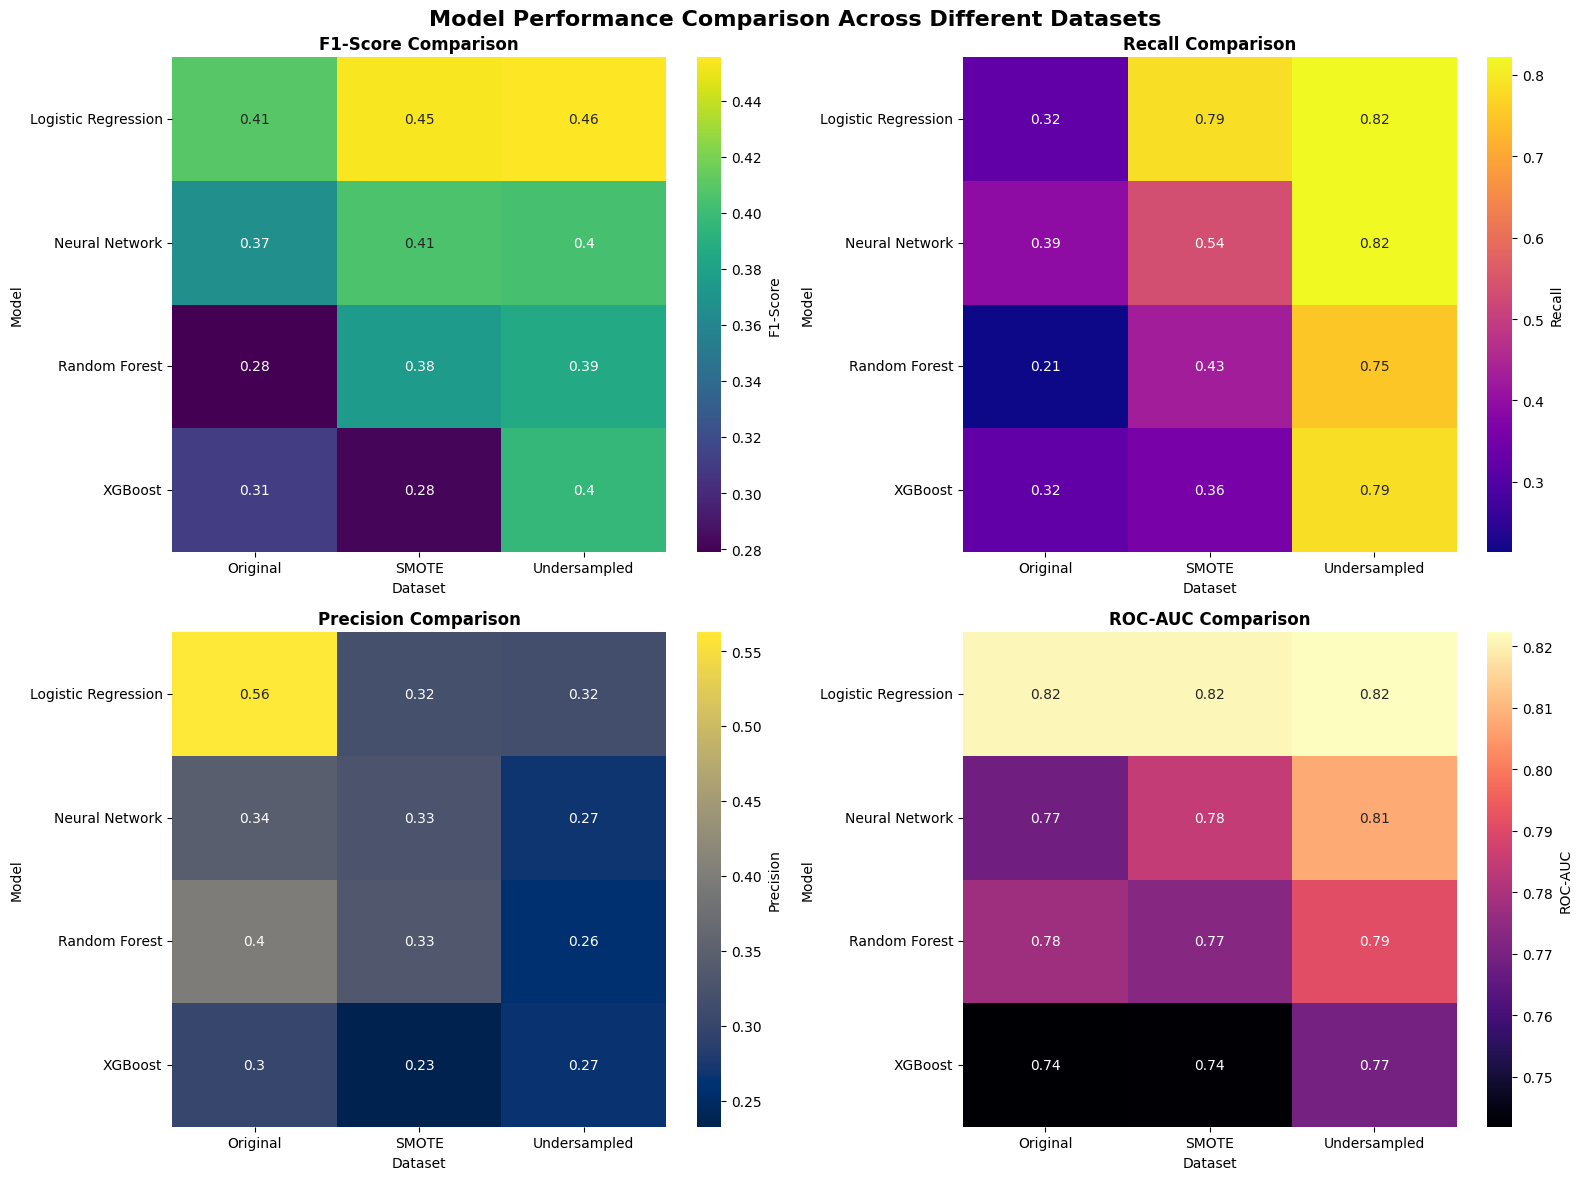

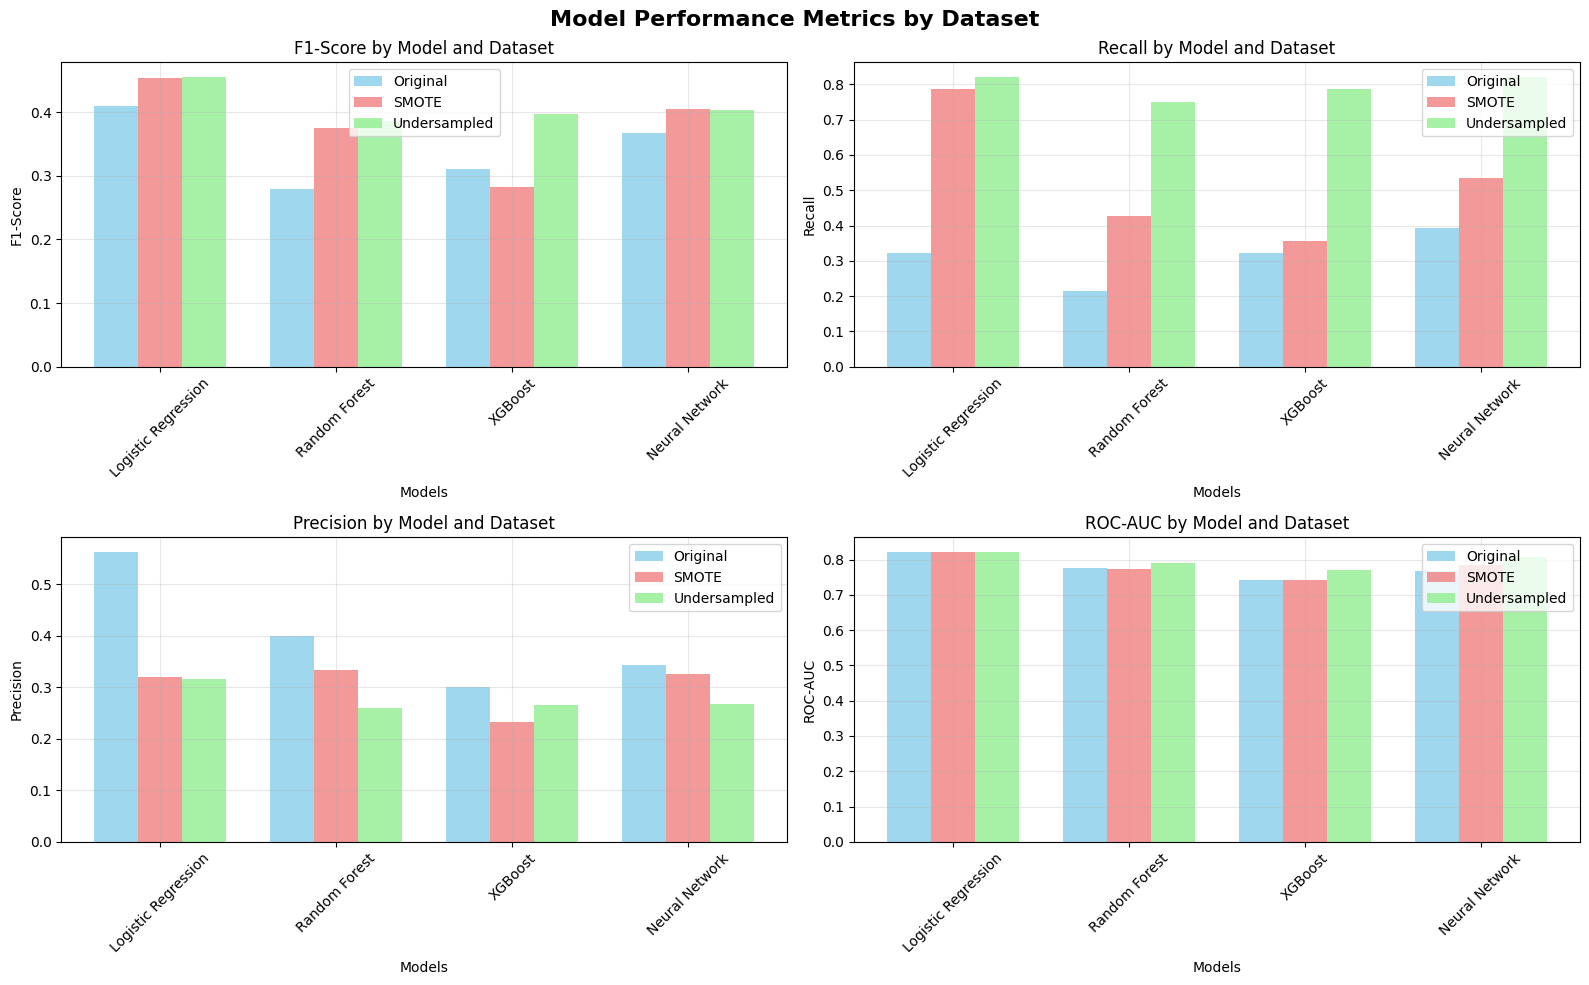

In [9]:
# Analyze and Visualize Results
print("=== DETAILED RESULTS ANALYSIS ===")

# 1. Best models by different metrics
print("🏆 BEST MODELS BY METRIC:")
print("-" * 40)

metrics_to_analyze = ['F1-Score', 'Recall', 'Precision', 'ROC-AUC']
for metric in metrics_to_analyze:
    if results_df[metric].notna().any():
        best_idx = results_df[metric].idxmax()
        best_result = results_df.iloc[best_idx]
        print(f"{metric:12s}: {best_result['Model']} on {best_result['Dataset']} ({best_result[metric]:.3f})")

# 2. Model performance comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison Across Different Datasets', fontsize=16, fontweight='bold')

# F1-Score comparison
ax1 = axes[0, 0]
pivot_f1 = results_df.pivot(index='Model', columns='Dataset', values='F1-Score')
sns.heatmap(pivot_f1, annot=True, cmap='viridis', ax=ax1, cbar_kws={'label': 'F1-Score'})
ax1.set_title('F1-Score Comparison', fontweight='bold')

# Recall comparison
ax2 = axes[0, 1]
pivot_recall = results_df.pivot(index='Model', columns='Dataset', values='Recall')
sns.heatmap(pivot_recall, annot=True, cmap='plasma', ax=ax2, cbar_kws={'label': 'Recall'})
ax2.set_title('Recall Comparison', fontweight='bold')

# Precision comparison
ax3 = axes[1, 0]
pivot_precision = results_df.pivot(index='Model', columns='Dataset', values='Precision')
sns.heatmap(pivot_precision, annot=True, cmap='cividis', ax=ax3, cbar_kws={'label': 'Precision'})
ax3.set_title('Precision Comparison', fontweight='bold')

# ROC-AUC comparison
ax4 = axes[1, 1]
pivot_roc = results_df.pivot(index='Model', columns='Dataset', values='ROC-AUC')
sns.heatmap(pivot_roc, annot=True, cmap='magma', ax=ax4, cbar_kws={'label': 'ROC-AUC'})
ax4.set_title('ROC-AUC Comparison', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Bar plots for better comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Model Performance Metrics by Dataset', fontsize=16, fontweight='bold')

metrics = ['F1-Score', 'Recall', 'Precision', 'ROC-AUC']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    
    # Create grouped bar plot
    for j, dataset in enumerate(results_df['Dataset'].unique()):
        dataset_data = results_df[results_df['Dataset'] == dataset]
        x_pos = np.arange(len(dataset_data)) + j * 0.25
        ax.bar(x_pos, dataset_data[metric], width=0.25, label=dataset, color=colors[j], alpha=0.8)
    
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} by Model and Dataset')
    ax.set_xticks(np.arange(len(results_df['Model'].unique())) + 0.25)
    ax.set_xticklabels(results_df['Model'].unique(), rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== CONFUSION MATRICES FOR TOP PERFORMERS ===


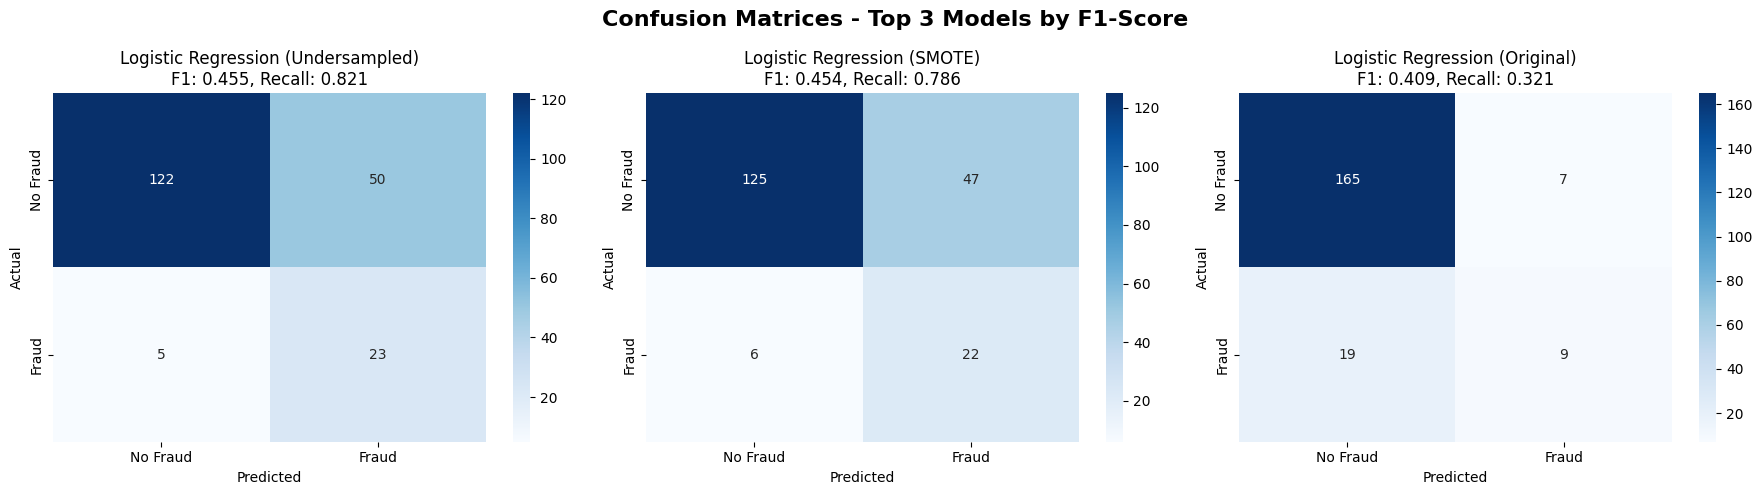

📊 DETAILED ANALYSIS OF TOP 3 MODELS:

1. Logistic Regression on Undersampled Dataset
--------------------------------------------------
   F1-Score:     0.455
   Precision:    0.315
   Recall:       0.821
   Accuracy:     0.725
   ROC-AUC:      0.822
   PR-AUC:       0.370
   CV F1 Score:  0.775 ± 0.066
   Training Time: 0.00 seconds
   True Negatives:  122 | False Positives: 50
   False Negatives: 5 | True Positives:  23
   Missed Fraud Rate: 17.9% (Critical for business)
   False Alarm Rate:  29.1% (Customer experience impact)

2. Logistic Regression on SMOTE Dataset
--------------------------------------------------
   F1-Score:     0.454
   Precision:    0.319
   Recall:       0.786
   Accuracy:     0.735
   ROC-AUC:      0.821
   PR-AUC:       0.378
   CV F1 Score:  0.777 ± 0.028
   Training Time: 0.01 seconds
   True Negatives:  125 | False Positives: 47
   False Negatives: 6 | True Positives:  22
   Missed Fraud Rate: 21.4% (Critical for business)
   False Alarm Rate:  27.3% (Cu

In [10]:
# Confusion Matrices for Best Models
print("=== CONFUSION MATRICES FOR TOP PERFORMERS ===")

# Get top 3 models by F1-score
top_models = results_df.nlargest(3, 'F1-Score')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices - Top 3 Models by F1-Score', fontsize=16, fontweight='bold')

for i, (idx, row) in enumerate(top_models.iterrows()):
    cm = np.array(row['Confusion Matrix'])
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No Fraud', 'Fraud'], 
                yticklabels=['No Fraud', 'Fraud'])
    
    axes[i].set_title(f"{row['Model']} ({row['Dataset']})\nF1: {row['F1-Score']:.3f}, Recall: {row['Recall']:.3f}")
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Detailed analysis of top performers
print("📊 DETAILED ANALYSIS OF TOP 3 MODELS:")
print("=" * 60)

for i, (idx, row) in enumerate(top_models.iterrows(), 1):
    print(f"\n{i}. {row['Model']} on {row['Dataset']} Dataset")
    print("-" * 50)
    print(f"   F1-Score:     {row['F1-Score']:.3f}")
    print(f"   Precision:    {row['Precision']:.3f}")
    print(f"   Recall:       {row['Recall']:.3f}")
    print(f"   Accuracy:     {row['Accuracy']:.3f}")
    print(f"   ROC-AUC:      {row['ROC-AUC']:.3f}")
    print(f"   PR-AUC:       {row['PR-AUC']:.3f}")
    print(f"   CV F1 Score:  {row['CV F1 Mean']:.3f} ± {row['CV F1 Std']:.3f}")
    print(f"   Training Time: {row['Training Time (s)']:.2f} seconds")
    
    # Confusion matrix interpretation
    cm = np.array(row['Confusion Matrix'])
    tn, fp, fn, tp = cm.ravel()
    print(f"   True Negatives:  {tn} | False Positives: {fp}")
    print(f"   False Negatives: {fn} | True Positives:  {tp}")
    
    # Business interpretation
    false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    print(f"   Missed Fraud Rate: {false_negative_rate:.1%} (Critical for business)")
    print(f"   False Alarm Rate:  {false_positive_rate:.1%} (Customer experience impact)")

In [11]:
# Final Model Selection and Recommendations
print("=== FINAL MODEL SELECTION ===")

# Select best model based on F1-score (balanced metric for fraud detection)
best_model_idx = results_df['F1-Score'].idxmax()
best_model_info = results_df.iloc[best_model_idx]

print("🏆 RECOMMENDED MODEL:")
print(f"   Model: {best_model_info['Model']}")
print(f"   Dataset: {best_model_info['Dataset']}")
print(f"   F1-Score: {best_model_info['F1-Score']:.3f}")
print(f"   Recall: {best_model_info['Recall']:.3f} (Critical for fraud detection)")
print(f"   Precision: {best_model_info['Precision']:.3f}")

# Get the actual trained model
best_model_key = f"{best_model_info['Model']}_{best_model_info['Dataset']}"
best_trained_model = trained_models[best_model_key]

print(f"\n📋 MODEL SELECTION RATIONALE:")
print("   • F1-Score balances precision and recall")
print("   • High recall is crucial for fraud detection (minimize missed fraud)")
print("   • Acceptable precision to avoid too many false alarms")
print("   • Cross-validation confirms model stability")

# Feature importance (if available)
if hasattr(best_trained_model, 'feature_importances_'):
    print(f"\n📈 FEATURE IMPORTANCE (Top Features):")
    feature_importance = pd.DataFrame({
        'Feature': features_to_use,
        'Importance': best_trained_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    for idx, row in feature_importance.head().iterrows():
        print(f"   {row['Feature']:20s}: {row['Importance']:.3f}")

# Save the best model and scaler
print(f"\n💾 SAVING BEST MODEL AND PREPROCESSOR:")
model_filename = f"best_fraud_model_{best_model_info['Model'].replace(' ', '_').lower()}.pkl"
scaler_filename = "fraud_detection_scaler.pkl"

# Save model
with open(model_filename, 'wb') as f:
    pickle.dump(best_trained_model, f)
print(f"   ✓ Model saved as: {model_filename}")

# Save scaler
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"   ✓ Scaler saved as: {scaler_filename}")

# Save feature list
features_filename = "fraud_detection_features.pkl"
with open(features_filename, 'wb') as f:
    pickle.dump(features_to_use, f)
print(f"   ✓ Features saved as: {features_filename}")

print(f"\n🎯 DEPLOYMENT CONSIDERATIONS:")
print("   • Monitor model performance over time")
print("   • Retrain periodically with new data")
print("   • Set appropriate thresholds based on business needs")
print("   • Consider ensemble methods for production")
print("   • Implement proper logging and alerting")

# Summary table
print(f"\n📊 COMPLETE RESULTS SUMMARY:")
summary_df = results_df[['Model', 'Dataset', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Training Time (s)']].round(3)
print(summary_df.to_string(index=False))

=== FINAL MODEL SELECTION ===
🏆 RECOMMENDED MODEL:
   Model: Logistic Regression
   Dataset: Undersampled
   F1-Score: 0.455
   Recall: 0.821 (Critical for fraud detection)
   Precision: 0.315

📋 MODEL SELECTION RATIONALE:
   • F1-Score balances precision and recall
   • High recall is crucial for fraud detection (minimize missed fraud)
   • Acceptable precision to avoid too many false alarms
   • Cross-validation confirms model stability

💾 SAVING BEST MODEL AND PREPROCESSOR:
   ✓ Model saved as: best_fraud_model_logistic_regression.pkl
   ✓ Scaler saved as: fraud_detection_scaler.pkl
   ✓ Features saved as: fraud_detection_features.pkl

🎯 DEPLOYMENT CONSIDERATIONS:
   • Monitor model performance over time
   • Retrain periodically with new data
   • Set appropriate thresholds based on business needs
   • Consider ensemble methods for production
   • Implement proper logging and alerting

📊 COMPLETE RESULTS SUMMARY:
              Model      Dataset  F1-Score  Recall  Precision  ROC-AU